# Voorspel Diabetes 2023

Luca Oldenbeuving, Kaggle = 

Sami Latic, Kaggle = 

## Importeren libraries

In [70]:
import numpy as np 
import pandas as pd 
import seaborn as sns
pd.set_option('display.max_rows', 1000)
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import string
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
SEED =45
from sklearn.model_selection import GridSearchCV
sm = SMOTE(random_state=SEED)
smk=SMOTETomek(random_state=SEED)
rus = RandomUnderSampler(random_state=SEED)
ros = RandomOverSampler(random_state=SEED)
adasyn = ADASYN(random_state=SEED)
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


ERROR: Could not find a version that satisfies the requirement gridsearchcv (from versions: none)
ERROR: No matching distribution found for gridsearchcv


## Data importeren

In [2]:
train_c = pd.read_csv('../Untitled Folder/train_c (1).csv')
p_id = train_c['p_id']
train = train_c.drop('p_id', axis=1 )
test = pd.read_csv('../Untitled Folder/test_c (1).csv')
p_id2 = test['p_id']
sub = pd.read_csv('../Untitled Folder/submission.csv')


## Opdracht 1: Exploratieve Data Analyse

In [3]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


We zien in deze dataset 9 features.

**Pregnancies** -> Het aantal zwangerschappen per persoon

**Glucose** -> De concentratie glucose in de patient

**BloodPressure** -> Diastolic blood pressure (mm Hg)

**SkinThickness** -> De dikte van de huid in milimeters

**Insulin** -> 2-uur serum insuline (mu U/ml)

**BMI** -> Body Mass Index

**DiabetesPedigreeFunction** -> Diabetes pedigree function

**Age** -> Leeftijd in jaren

**Outcome** -> Of de patient diabetes heeft of niet. 1 betekent dat de patient diabetes heeft, 0 betekent dat de patient geen diabetes heeft.

In [4]:
print("Aantal rijen in de train dataset: ", train.shape)
print("Aantal rijen in de test dataset: ", test.shape)

Aantal rijen in de train dataset:  (614, 9)
Aantal rijen in de test dataset:  (154, 9)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.809446,3.375544,0.000,1.000,3.0000,6.0000,15.00
Glucose,614.0,120.465798,31.959619,0.000,99.000,115.0000,140.0000,197.00
BloodPressure,614.0,68.903909,19.933385,0.000,62.000,72.0000,80.0000,114.00
SkinThickness,614.0,20.456026,16.063105,0.000,0.000,23.0000,32.0000,99.00
Insulin,614.0,81.250814,116.947384,0.000,0.000,27.0000,130.0000,744.00
BMI,614.0,31.929642,8.136791,0.000,27.400,32.1500,36.5000,67.10
DiabetesPedigreeFunction,614.0,0.468096,0.329203,0.078,0.238,0.3655,0.6285,2.42
Age,614.0,33.265472,11.851427,21.000,24.000,29.0000,41.0000,72.00
Outcome,614.0,0.342020,0.474773,0.000,0.000,0.0000,1.0000,1.00


Hier zijn we een aantal opmerkelijke waardes. We zijn dat Glucose, Bloodpressure, Skinthickness, Insuline en BMI nul waardes heeft. Dit is bij allen niet mogelijk, aangezien je zonder deze kenmerken geen levend mens kan zijn.

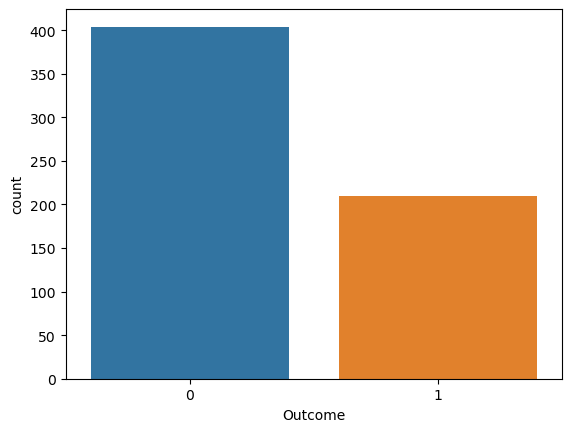

In [7]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(train['Outcome'])
plt.show()

In [8]:
train['Outcome'].value_counts()

0    404
1    210
Name: Outcome, dtype: int64

De distributie van de dependant variable is in dit dataset niet skewed of imbalanced. Er is geen officiele regel wanneer een dataset imbalanced is.

'However, a common rule of thumb is that if the minority class in your dataset constitutes less than 10-20% of your total data, it can be considered imbalanced.'
Bron toevoegen
https://datascience.stackexchange.com/questions/122571/determining-whether-a-dataset-is-imbalanced-or-not#:~:text=However%2C%20a%20common%20rule%20of,it%20can%20be%20considered%20imbalanced.

## Null waardes weghalen

In [9]:
train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [10]:
col = list(train.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(train[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Outcome
Numerical Features : Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age


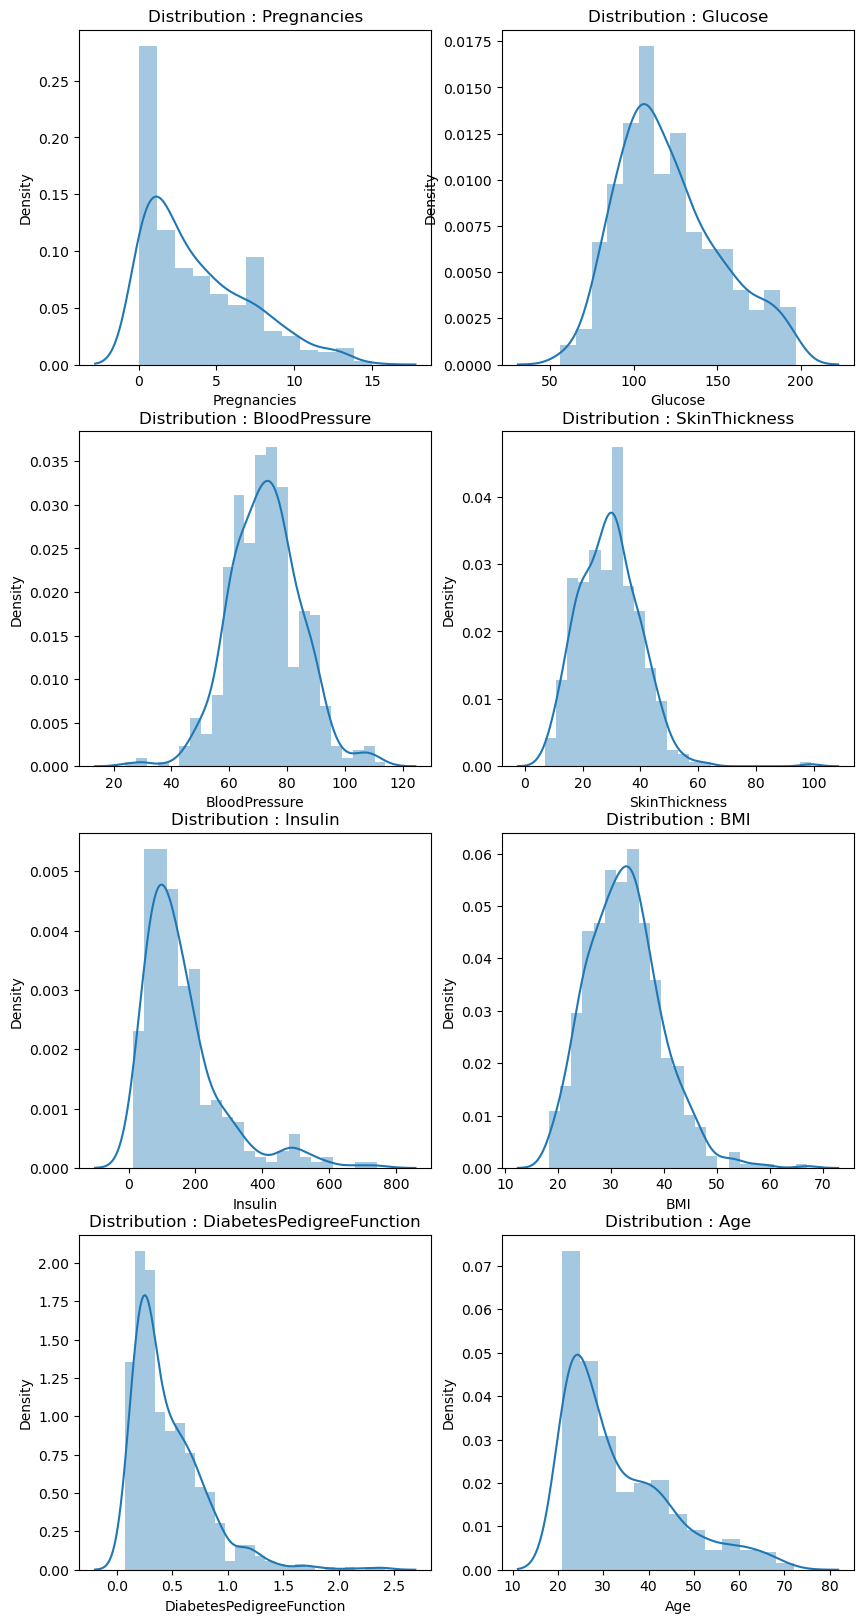

In [11]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (10,20))
for i in range(len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.distplot(train[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

We zien nu hoe de verschillende waardes verdeeld zijn. Om de null waardes te verwijderen moeten we eerst kijken of we de gemiddelde, mediaan of de modus moeten nemen. Dit doen we door te kijken naar de skewness van de variabelen. Ook kunnen we dan zien hoe groot de kurtosis is.

Pregnancies, Insulin, DiabetesPedigreeFunction and Age vertonen een positieve of rechtsscheve gegevensverdeling.
BloodPressure and Skin Thickness vertonen een bimodale gegevensverdeling.

In [12]:
from scipy.stats import skew
for col in train.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, train[col].skew()))

Skewness for the column Pregnancies is 0.8963315104115814
Skewness for the column Glucose is 0.5576675590409781
Skewness for the column BloodPressure is 0.05708462866086845
Skewness for the column SkinThickness is 0.8284566904662104
Skewness for the column Insulin is 1.9114232642462705
Skewness for the column BMI is 0.640198876348773
Skewness for the column DiabetesPedigreeFunction is 1.8769022757390479
Skewness for the column Age is 1.1239855864706296


De kolommen Pregnancies, Glucose, BloodPressure, SkinThickness, BMI en Age zijn niet erg geskewed. Ze wijken niet veel af van de normale verdeling. De kolommen Insulin en DiabetesPedigreeFunction zijn erg geskewed. Ze hebben een skew van >1.5.

0 waarden die niet geskewed zijn worden gevuld met het gemiddelde van de kolommen.
0 waarden die wel geskewed zijn worden gevuld met de mediaan.

In [13]:
train['Insulin'] = train['Insulin'].fillna(train['Insulin'].median()) # DiabetesPedigreeFunction heeft geen 0 waarden

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    train[col] = train[col].fillna(train[col].mean())

#### Zelfde voor de test dataset

In [14]:
from scipy.stats import skew
for col in test.columns:
    print("Skewness for the column {} is {}".format(col, test[col].skew()))

Skewness for the column p_id is -0.045476671297433116
Skewness for the column Pregnancies is 0.9379958953973725
Skewness for the column Glucose is 0.43213606869133103
Skewness for the column BloodPressure is 0.42791149755976904
Skewness for the column SkinThickness is 0.04358273933246738
Skewness for the column Insulin is 3.4340204307191167
Skewness for the column BMI is 0.3988386036419412
Skewness for the column DiabetesPedigreeFunction is 2.092732726485556
Skewness for the column Age is 1.1622103757967737


In [15]:
test['Insulin'] = test['Insulin'].fillna(test['Insulin'].median()) # DiabetesPedigreeFunction heeft geen 0 waarden

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    test[col] = test[col].fillna(test[col].mean())

In [16]:
train.isnull().sum()
test.isnull().sum()

p_id                        0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

bRON TOEVOEGEN

In [17]:
def gemiddelde(var):
    """
    Een functie die het gemiddelde zal teruggeven van de waarden in de 'var'-kolom, 
    afhankelijk van of de persoon diabetes heeft of niet.
    """
    return pd.DataFrame(train.groupby('Outcome').mean()[var])

In [18]:
def distplot(col_name):
    """
    Een functie die de verdeling van de kolom 'col_name' 
    afzonderlijk zal plotten voor mensen met diabetes en mensen zonder diabetes.
    """
    plt.figure()
    ax = sns.distplot(train[col_name][train.Outcome == 1], color ="red", rug = True)
    sns.distplot(train[col_name][train.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'Geen Diabetes'])

### Pregnancies

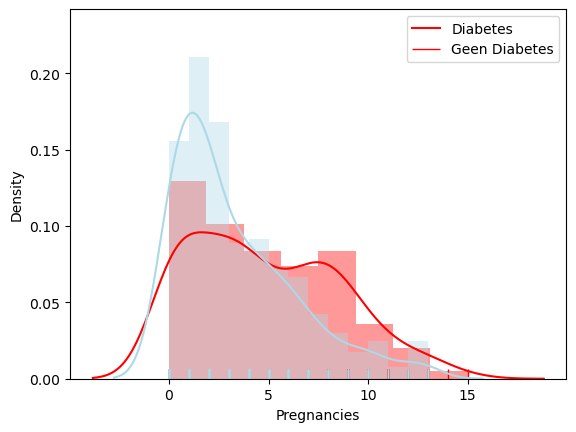

In [19]:
distplot('Pregnancies')

In [20]:
gemiddelde('Pregnancies')

,Pregnancies
Outcome,
0,3.267327
1,4.852381


We zien hier dat mensen met meer Pregnancies vaker diabetes hebben

### Glucose

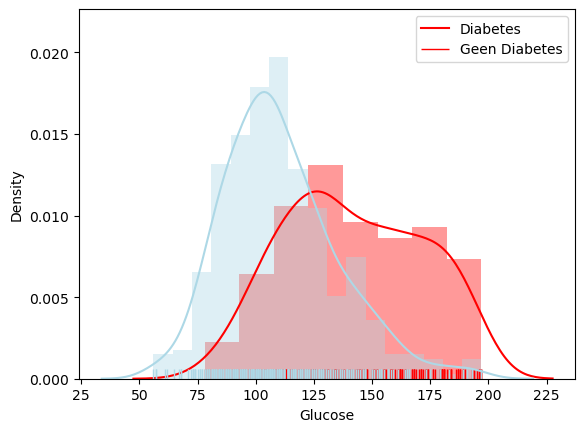

In [21]:
distplot('Glucose')

In [22]:
gemiddelde('Glucose')

,Glucose
Outcome,
0,110.422691
1,142.096456


Mensen met diabetes hebben vaak een hoger glucose.

### Insulin


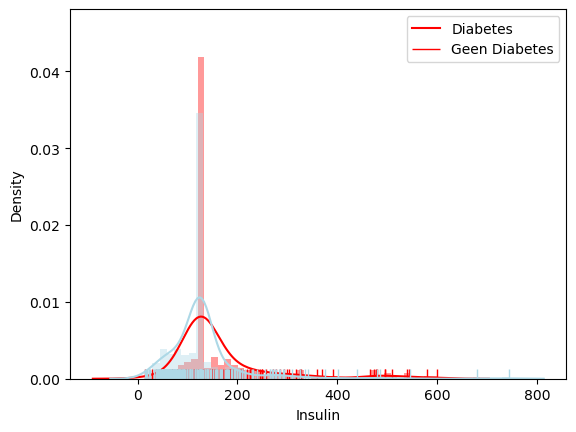

In [23]:
distplot('Insulin')

In [24]:
gemiddelde('Insulin')

,Insulin
Outcome,
0,130.650990
1,166.214286


Mensen met diabetes hebben vaak een hogere insuline waarde.

### BloodPressure

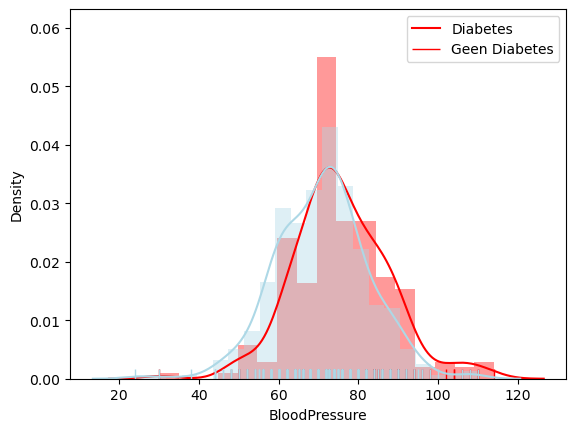

In [25]:
distplot('BloodPressure')

In [26]:
gemiddelde('BloodPressure')

,BloodPressure
Outcome,
0,70.948563
1,75.682766


Mensen met diabetes hebben vaker een hogere bloeddruk.

### Een paar visualisaties voor betere indruk van de data

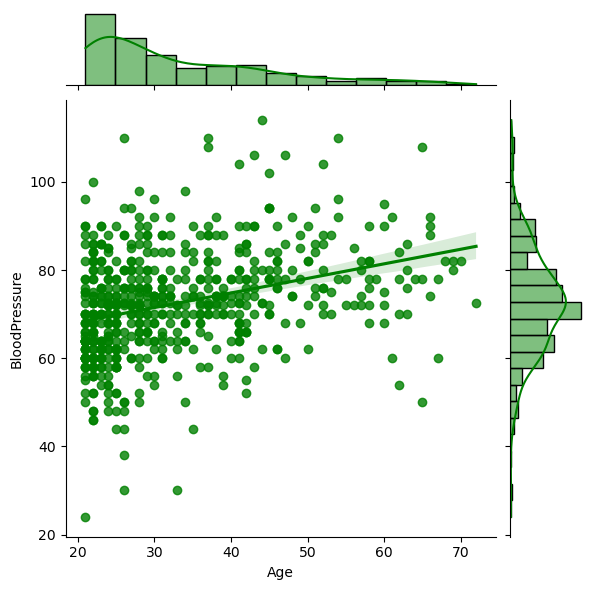

In [27]:
sns.jointplot(x='Age',y='BloodPressure', data=train, kind = 'reg', color = 'green')

Wanneer je ouder wordt, stijgt je bloeddruk.

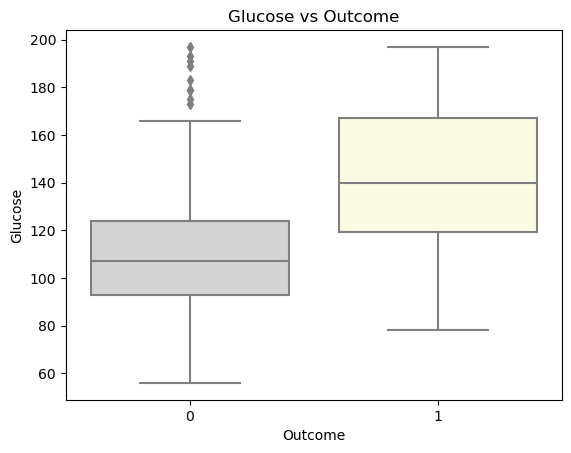

In [28]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = train, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

Wanneer je glucose hoger ligt, heb je vaker diabetes.

In [29]:
train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.119166,0.221029,0.052710,0.035671,0.019085,-0.022406,0.529585,0.222939
Glucose,0.119166,1.000000,0.248581,0.210825,0.423187,0.224476,0.157264,0.250404,0.494147
BloodPressure,0.221029,0.248581,1.000000,0.152262,0.047674,0.288150,0.007743,0.325883,0.186998
SkinThickness,0.052710,0.210825,0.152262,1.000000,0.181533,0.549367,0.103679,0.113026,0.200384
Insulin,0.035671,0.423187,0.047674,0.181533,1.000000,0.202816,0.142310,0.074660,0.193302
BMI,0.019085,0.224476,0.288150,0.549367,0.202816,1.000000,0.138444,0.020889,0.292495
DiabetesPedigreeFunction,-0.022406,0.157264,0.007743,0.103679,0.142310,0.138444,1.000000,0.040877,0.182245
Age,0.529585,0.250404,0.325883,0.113026,0.074660,0.020889,0.040877,1.000000,0.233461
Outcome,0.222939,0.494147,0.186998,0.200384,0.193302,0.292495,0.182245,0.233461,1.000000


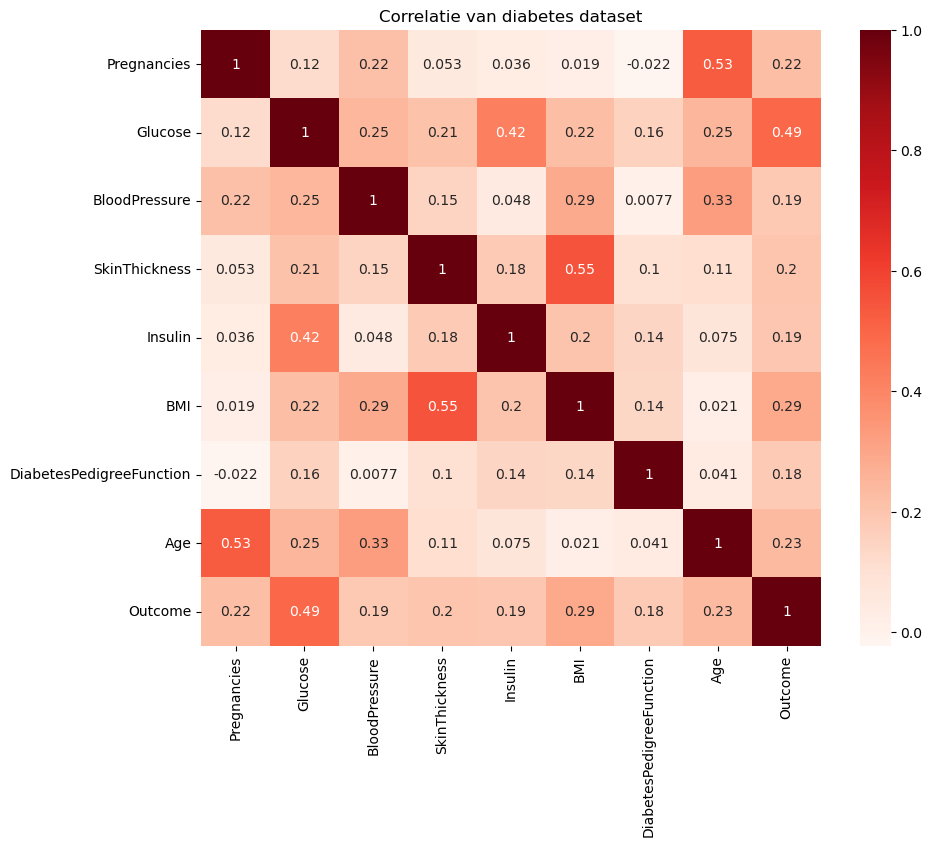

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), cmap="Reds", annot=True)
plt.title('Correlatie van diabetes dataset')
plt.show()

Elke variabelen in onze dataset is vrij zwak gecorreleerd met elkaar. Dit haalt het begrip multicollinearity weg. Uitleg

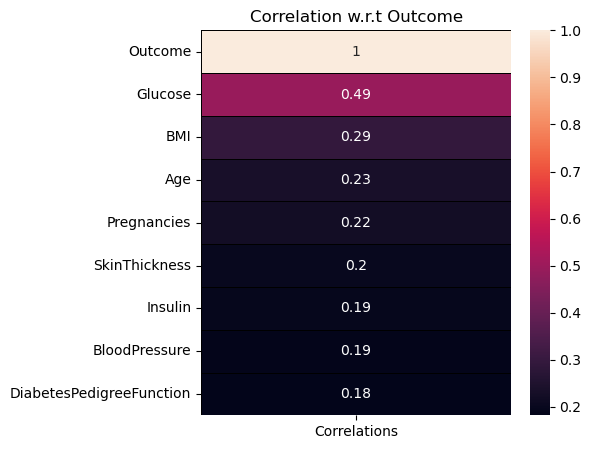

In [31]:
corr = train.corrwith(train['Outcome']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True, linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

### ANOVA toets om te kijken of alle kolommen wel nodig zijn

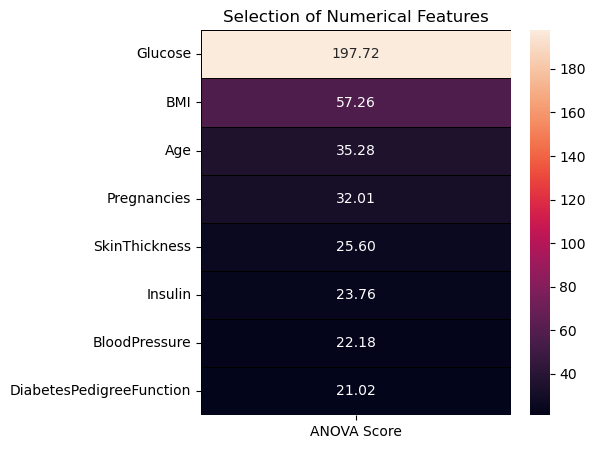

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = train.loc[:,numerical_features]
target = train.loc[:,categorical_features]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

Volgens de ANOVA test zijn de kolommen met hogere waarden belangrijk. Aangezien de laagste waarde 21 is, droppen we geen kolommen.

# eind conclusie toevoegen + opdracht kijken

## Opdracht 2 - Evaluatie

Biem

Bam

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

This can be thought of as subtracting the mean value or centering the data. Scaling the features is of utmost importance because different features are in different scales. Let's say the Age has values in double digits, whereas the DPF is of the kind float, the effect of the Age feature will be more as compared to the DPF

Best practice is to use only the training set to figure out how to scale / normalize, then blindly apply the same transform to the test set.

For example, say you're going to normalize the data by removing the mean and dividing out the variance. If you use the whole dataset to figure out the feature mean and variance, you're using knowledge about the distribution of the test set to set the scale of the training set - 'leaking' information.

The right way to do this is to use only the training set to calculate the mean and variance, normalize the training set, and then at test time, use that same (training) mean and variance to normalize the test set.

## Opdracht 3 - Modelleren

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,plot_confusion_matrix

X = train.drop('Outcome', axis = 1)
y = train['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       115
           1       0.60      0.82      0.70        39

    accuracy                           0.82       154
   macro avg       0.77      0.82      0.78       154
weighted avg       0.85      0.82      0.83       154

Logistic Regression:> 0.8181818181818182


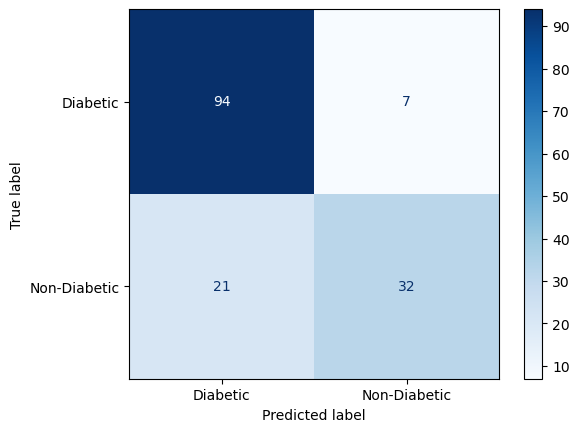

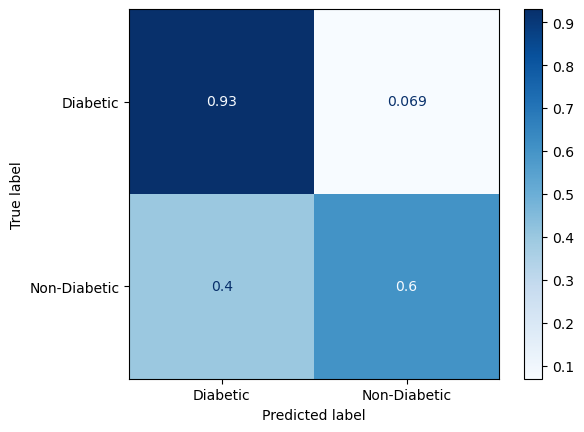

In [34]:
log = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))\

plot_confusion_matrix(log,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(log,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier


              precision    recall  f1-score   support

           0       0.86      0.81      0.84       107
           1       0.62      0.70      0.66        47

    accuracy                           0.78       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.79      0.78      0.78       154

DecisionTreeClassifier:> 0.7792207792207793


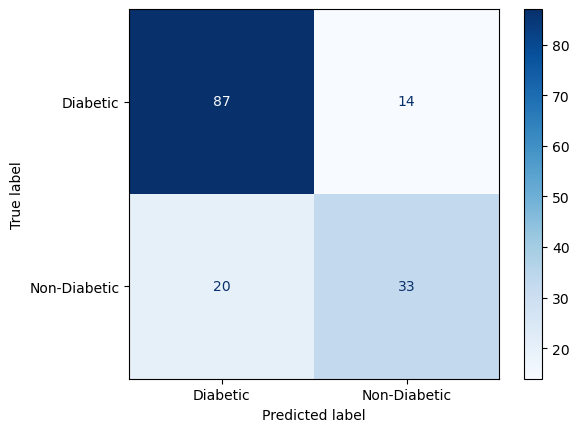

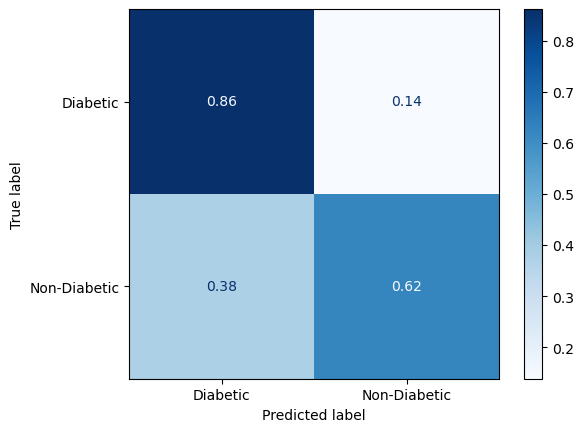

In [38]:
dec =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
  random_state=27, splitter='best')
dec.fit(X_train,y_train)
y_pred = dec.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))

plot_confusion_matrix(dec,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(dec,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

We know that Decision Tree Classifier is prone to Overfitting, and that's what we have got here. We can see that the train accuracy is 100% but the test accuracy is only 67.71%. We also know that Random Forest Classifier helps to overcome this drawback of Decision Tree Classifer. Let's check that model out.

## Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [72]:

model_grid = RandomForestClassifier(max_depth=9, 
                                    max_features="log2", 
                                    max_leaf_nodes=9, 
                                    n_estimators=25) 
model_grid.fit(X_train, y_train) 
y_pred_grid = model_grid.predict(X_test) 
print(classification_report(y_pred_grid, y_test)) 

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        84
           1       0.55      0.72      0.62        39

    accuracy                           0.72       123
   macro avg       0.70      0.72      0.70       123
weighted avg       0.75      0.72      0.73       123



**Wat is een Random Forest?**

Een random forest is een machine learning-techniek die wordt gebruikt om regressie- en classificatieproblemen op te lossen. Het maakt gebruik van ensemble learning, een techniek die vele classificatoren combineert om oplossingen te bieden voor complexe problemen. 

Een random forest-algoritme bestaat uit veel decision trees. De 'forest' dat gegenereerd wordt door het random forest-algoritme wordt getraind via bagging of bootstrap aggregating. Bagging, ook wel bekend als bootstrap aggregating, is de ensemble learning-methode die doorgaans wordt gebruikt om de variantie binnen een rumoerige dataset te verminderen.

Het (random forest) algoritme bepaalt de uitkomst op basis van de voorspellingen van de decision trees. Het voorspelt door het gemiddelde te nemen van de uitvoer van verschillende bomen. Het verhogen van het aantal bomen verhoogt de precisie van de uitkomst.

**Hoe werkt een Random Forest?**

Random Forest werkt door een set beslisbomen te combineren tot een ensemble.
Elke boom is gebouwd met willekeurige subsets van gegevens. Hierdoor kan het Random Forest-algoritme meer accurate voorspellingen maken dan traditionele machine learning-methoden. Het willekeurige selectieproces helpt de variantie en overfitting binnen het model te verminderen, terwijl het robuuster en bestendiger wordt tegen ruis in de gegevens.

Het proces begint met het voorbereiden van meerdere subsets van de trainingsdata door middel van **bootstrap aggregating**, ook wel bekend als "bagging". Bagging houdt in dat er willekeurig monsters (steekproeven) worden genomen uit de oorspronkelijke trainingsdata met vervanging. Dit betekent dat sommige gegevenspunten meerdere keren in dezelfde subset kunnen voorkomen, terwijl andere helemaal niet worden opgenomen.

Voor elke subset van de trainingsdata wordt een afzonderlijke beslisboom gebouwd. Dit gebeurt met behulp van een beslisboomalgoritme, zoals **CART** (Classification and Regression Trees) of **Gini-index**, om de dataset in verschillende kenmerkensplitsingen op te delen.
Belangrijk is dat bij elke split in de boom slechts een willekeurige subset van de beschikbare kenmerken wordt overwogen. Dit vermindert de correlatie tussen de bomen en voorkomt overfitting.

Tijdens de training genereert Random Forest meerdere beslisbomen, die worden gebruikt om voorspellingen te doen voor ongeziene gegevenspunten (testinstanties). Bij voorspellingstijd berekent het Random Forest-algoritme het resultaat voor een gegeven testinstantie door het gemiddelde te nemen van de voorspellingen van elke boom.
Dit gemiddelde mechanisme helpt de variantie van het Random Forest-model te verminderen en leidt tot meer accurate voorspellingen.

Ze kunnen nauwkeurig voorspellingen doen met minimaal voorafgaand gegevenspreprocessing en bieden robuuste voorspellende nauwkeurigheid, zelfs in lawaaierige datasets.
Bovendien zijn Random Forests eenvoudig te trainen en schalen ze goed naar grote datasets met duizenden functies of dimensies.

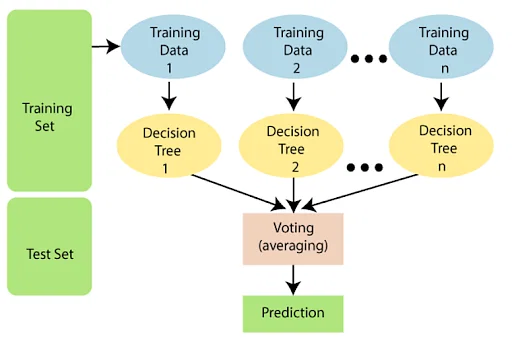

*IMAGE COURTESY: javapoint*

**Leg uit hoe de performance van dit model zich verhoudt tot de performance van andere Tree based modellen**

- Een decision tree is eenvoudiger en gemakkelijker te interpreteren, maar gevoelig voor overfitting, terwijl een random forest complexer is en het risico op overfitting vermindert.

Kijken we naar de decision tree in het notebook zien we duidelijk een geval van overfitting. De train accuracy is 100% en de test accuracy veel lager.

- Een random forest levert doorgaans robuustere en betere prestaties op nieuwe gegevens, en wordt veel gebruikt in verschillende domeinen zoals financiën, gezondheidszorg en diep leren.

- Het belangrijkste verschil tussen random forests en gradient boosting ligt in hoe de beslisbomen worden gemaakt en samengevoegd. In tegenstelling tot random forests worden de beslisbomen in gradient boosting additief opgebouwd, wat betekent dat elke beslisboom één voor één wordt gemaakt en toegevoegd aan het model.

(https://leonlok.co.uk/blog/decision-trees-random-forests-gradient-boosting-whats-the-difference/#:~:text=The%20main%20difference%20between%20random,is%20built%20one%20after%20another.)

**Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric.**

Om de beste hyperparameters te bepalen zullen we gebruik maken van een GridSearch met cross-validation. We zullen grid search gebruiken om te zoeken naar de beste hyperparameters voor een Random Forest Classifier in termen van de nauwkeurigheid (accuracy) op de testset. We zullen de volgende hyperparameters afstemmen:

- n_estimators: Het aantal bomen in het ensemble.
- max_depth: De maximale diepte van elke boom.
- min_samples_split: Het minimum aantal samples dat nodig is om een knoop te splitsen.
- min_samples_leaf: Het minimum aantal samples dat nodig is om een bladknoop te vormen.

In [62]:
#Mogelijkheden voor hyperparameters

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [73]:
random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=6,
                       n_estimators=150)


**Gebruik nu de Hyperparameters uit de gridsearch voor een hogere f1 score**

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        86
           1       0.57      0.78      0.66        37

    accuracy                           0.76       123
   macro avg       0.73      0.76      0.73       123
weighted avg       0.79      0.76      0.76       123

0.7560975609756098


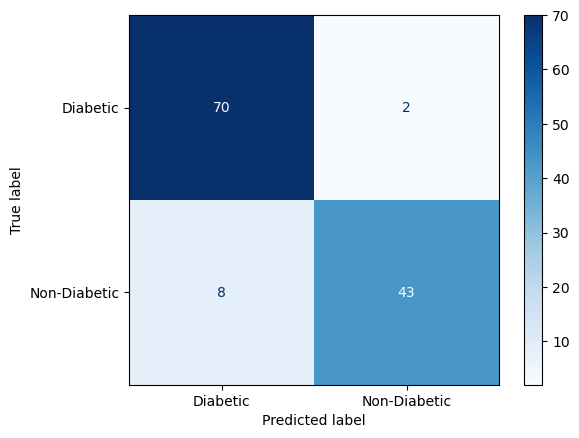

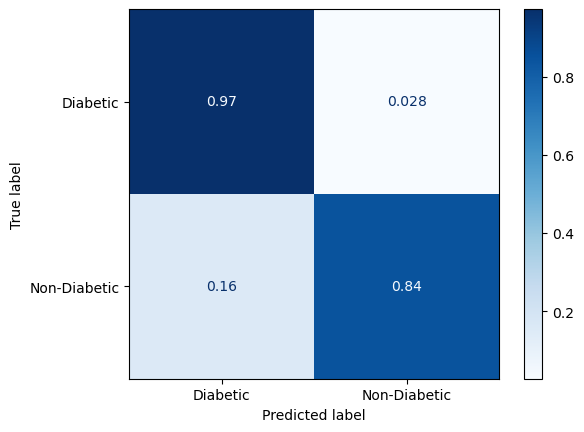

In [75]:
rf1 = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=6, n_estimators=150, bootstrap=True)
rf1.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

**Conclusie Random forest classifier**

Het classificatiemodel vertoont een redelijke prestatie, met een hoge precisie voor klasse 0 en een goede recall voor klasse 1, resulterend in een algemene nauwkeurigheid van 76%. Het model lijkt beter te zijn in het identificeren van negatieve gevallen dan positieve gevallen, en de keuze voor gebruik ervan hangt af van de specifieke prioriteiten en eisen van het probleem dat wordt opgelost.

## Gradient boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from dtreeviz.trees import *

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        81
           1       0.61      0.74      0.67        42

    accuracy                           0.75       123
   macro avg       0.73      0.75      0.73       123
weighted avg       0.77      0.75      0.75       123

GradientBoostingClassifier:> 0.7479674796747967


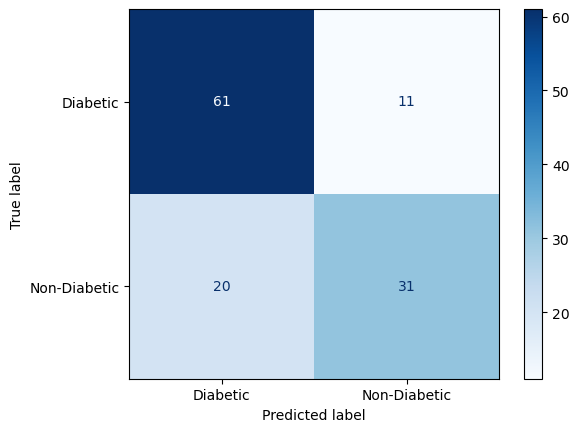

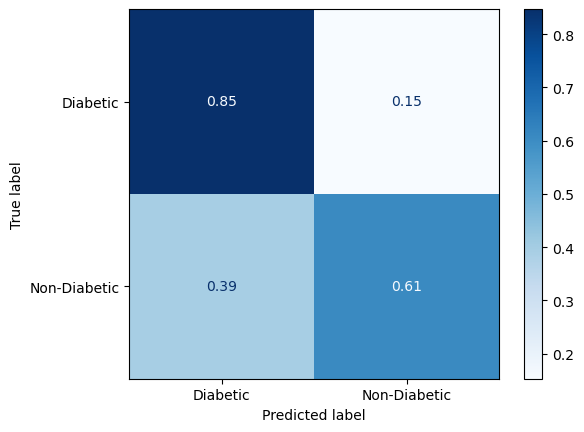

In [78]:
Gboost = GradientBoostingClassifier(random_state=0)
Gboost.fit(X_train,y_train)
y_pred = Gboost.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))

plot_confusion_matrix(Gboost,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(Gboost,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

**Wat is Gradient Boosting?**

**Hoe werkt Gradient Boosting?**

## Opdracht 3 - Bevindingen


## Opdracht 4 - Conclusie en aanbevelingen
